In [1]:
import pickle
import random
import warnings
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from IPython.core.display import display, HTML
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, roc_auc_score
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_rows', None)
pd.pandas.set_option('display.max_columns', None)
display(HTML('<style>.container{width : 100% ! important;}</style>'))

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [3]:
df_train.head()

,Transaction ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,465493,160933.0,-0.469383,0.944148,0.047223,-0.954715,1.374033,-0.094950,0.890572,0.109714,-0.198917,-1.621648,0.677703,0.405150,-0.212072,-1.531859,-1.100064,0.290751,0.735620,0.821074,0.407170,-0.011484,-0.164264,-0.388369,-0.284629,0.094658,0.111689,-0.108511,0.099751,0.152410,7.00,0
1,336662,80865.0,1.103816,-0.205496,1.350105,0.893491,-1.052071,-0.012629,-0.675143,0.178974,0.875989,-0.293025,-0.188309,0.731998,0.153651,-0.394624,0.408450,-0.232430,0.211982,-0.812418,-0.524743,-0.118579,-0.036948,0.116054,0.093842,0.454146,0.142234,0.324634,0.033858,0.028680,14.99,0
2,357179,104436.0,0.138446,1.217584,-0.293554,0.483069,1.180806,-1.208567,1.564626,-0.480288,0.511007,-0.681823,-0.123528,-2.975377,0.889293,2.238183,-0.890180,-0.430066,0.239167,-0.007760,-0.829333,-0.296091,0.050834,0.392587,-0.232261,-0.166938,0.177935,-0.589114,0.009673,0.024138,19.99,0
3,262371,49241.0,0.991295,-0.645264,1.032155,0.331717,-1.216554,-0.317276,-0.430301,-0.033865,1.035865,-0.535720,-0.620529,1.128655,1.029532,-0.735555,-0.401473,-0.152193,0.087158,-0.740995,0.424010,0.222022,-0.152953,-0.389418,-0.033484,0.500995,0.129980,0.926788,-0.048619,0.036531,123.06,0
4,234477,36772.0,-0.717427,-3.468358,0.084280,0.955867,-1.711766,1.232775,0.290128,0.275804,0.840400,-0.725275,1.259676,1.165983,-0.529007,0.016380,-0.364619,-0.328462,0.495466,-0.790906,-0.331250,1.718714,0.430734,-0.603584,-0.682557,-0.184120,-0.396997,0.855515,-0.180882,0.158518,935.95,0


In [4]:
X = df_train.drop(['Transaction ID', 'Time', 'Class'], axis = 1)
y = df_train['Class']

In [5]:
y.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [6]:
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X), columns = X.columns)

In [7]:
X_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.239399,0.572132,0.031106,-0.673864,0.992997,-0.070891,0.712090,0.092261,-0.182178,-1.487675,0.665150,0.406405,-0.212355,-1.602484,-1.203476,0.332538,0.869787,0.979926,0.499258,-0.014268,-0.220934,-0.535007,-0.453051,0.156089,0.211911,-0.223308,0.245859,0.469559,-0.319215
1,0.563285,-0.125140,0.887696,0.631236,-0.760256,-0.009155,-0.541303,0.150137,0.795386,-0.268399,-0.183900,0.734074,0.155281,-0.412837,0.445573,-0.265366,0.250391,-0.970527,-0.644530,-0.151940,-0.048424,0.159890,0.150983,0.748856,0.270458,0.675860,0.083143,0.088938,-0.287875
2,0.070730,0.737974,-0.192940,0.341419,0.853360,-0.906032,1.251687,-0.400765,0.463456,-0.625198,-0.120388,-2.982610,0.894769,2.341307,-0.974039,-0.491229,0.282548,-0.009734,-1.018371,-0.380134,0.070518,0.540844,-0.369473,-0.275260,0.338888,-1.220992,0.023420,0.074967,-0.268262
3,0.505874,-0.391864,0.678657,0.234543,-0.879122,-0.237621,-0.345301,-0.027719,0.940785,-0.491119,-0.607654,1.131726,1.035743,-0.769480,-0.439804,-0.173669,0.102740,-0.885245,0.519927,0.285905,-0.205608,-0.536452,-0.052227,0.826107,0.246970,1.925872,-0.120529,0.113089,0.136026
4,-0.365957,-2.104103,0.055470,0.675283,-1.236993,0.924819,0.231420,0.231051,0.763020,-0.665074,1.235726,1.169148,-0.530948,0.017109,-0.399517,-0.375114,0.585716,-0.944840,-0.407046,2.209915,0.585272,-0.831489,-1.088139,-0.303593,-0.763130,1.777916,-0.447138,0.488348,3.324557


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.2, random_state = 17, stratify = y)

In [9]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((182276, 29), (45569, 29), (182276,), (45569,))

In [10]:
lr = LogisticRegression(verbose = 2)
lr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


LogisticRegression(verbose=2)

Logistic Regression:
----------------------------------------------------------------------------------------------------
Train f1_score:  0.7225325884543761
Validation f1_score:  0.759124087591241
----------------------------------------------------------------------------------------------------
Train precision:  0.8738738738738738
Validation precision:  0.896551724137931
----------------------------------------------------------------------------------------------------
Train recall:  0.6158730158730159
Validation recall:  0.6582278481012658
----------------------------------------------------------------------------------------------------


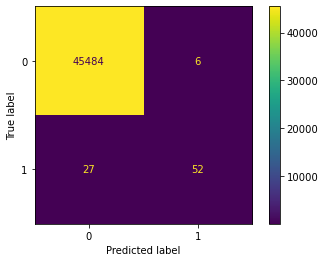

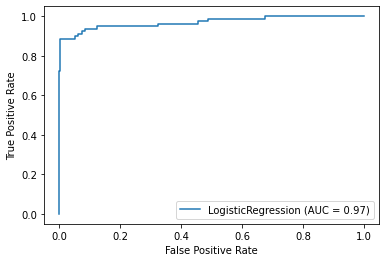

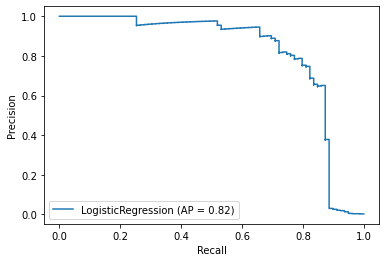

In [11]:
y_train_pred_lr = lr.predict(X_train)
y_val_pred_lr = lr.predict(X_val)
print('Logistic Regression:')
print('-' * 100)
print('Train f1_score: ', f1_score(y_train, y_train_pred_lr))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_lr))
print('-' * 100)
print('Train precision: ', precision_score(y_train, y_train_pred_lr))
print('Validation precision: ', precision_score(y_val, y_val_pred_lr))
print('-' * 100)
print('Train recall: ', recall_score(y_train, y_train_pred_lr))
print('Validation recall: ', recall_score(y_val, y_val_pred_lr))
print('-' * 100)
plot_confusion_matrix(lr, X_val, y_val)
plot_roc_curve(lr, X_val, y_val)
plot_precision_recall_curve(lr, X_val, y_val)

In [12]:
dtc = DecisionTreeClassifier()
possible_parameter_values = {'criterion' : ['gini', 'entropy'],
                             'splitter' : ['best', 'random'],
                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)],
                             'min_samples_split' : [int(x) for x in np.arange(start = 5, stop = 101, step = 1)],
                             'min_samples_leaf' : [int(x) for x in np.arange(start = 1, stop = 51, step = 1)]}
dtc_rscv = RandomizedSearchCV(estimator = dtc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, random_state = 17, n_jobs = 1)
dtc_rscv.fit(X_train, y_train)
dtc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.4s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.5s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.5s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.4s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.5s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini 
[CV]  splitter=random, min_samples_split=29, min_samples_leaf=38, max_depth=35, criterion=gini, total=   0.5s
[CV] splitter=random, min_samples_split=29, min_samples_leaf=38, max_d

[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.4s
[CV] splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy 
[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.4s
[CV] splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy 
[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.3s
[CV] splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy 
[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.3s
[CV] splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy 
[CV]  splitter=random, min_samples_split=59, min_samples_leaf=12, max_depth=35, criterion=entropy, total=   0.3s
[CV] splitter=random, min_samples_split=59,

[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   5.3s
[CV] splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy 
[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   6.4s
[CV] splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy 
[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   6.2s
[CV] splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy 
[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   6.8s
[CV] splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy 
[CV]  splitter=best, min_samples_split=79, min_samples_leaf=10, max_depth=60, criterion=entropy, total=   6.8s
[CV] splitter=best, min_samples_split=79, min_samples_leaf=10

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.0min finished


{'splitter': 'best',
 'min_samples_split': 59,
 'min_samples_leaf': 16,
 'max_depth': 45,
 'criterion': 'gini'}

Decision Tree Classifier:
----------------------------------------------------------------------------------------------------
Train f1_score:  0.8253968253968255
Validation f1_score:  0.7763157894736841
----------------------------------------------------------------------------------------------------
Train precision:  0.9285714285714286
Validation precision:  0.8082191780821918
----------------------------------------------------------------------------------------------------
Train recall:  0.7428571428571429
Validation recall:  0.7468354430379747
----------------------------------------------------------------------------------------------------


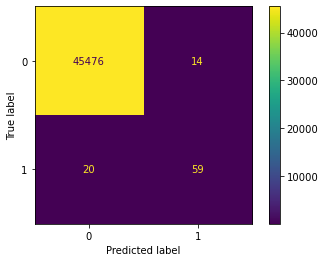

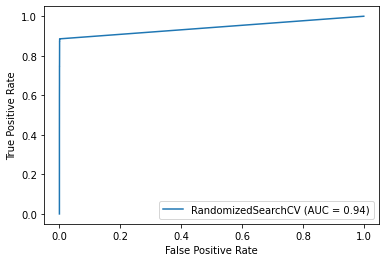

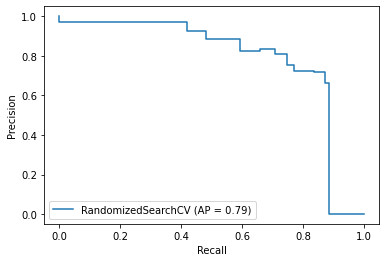

In [13]:
y_train_pred_dtc = dtc_rscv.predict(X_train)
y_val_pred_dtc = dtc_rscv.predict(X_val)
print('Decision Tree Classifier:')
print('-' * 100)
print('Train f1_score: ', f1_score(y_train, y_train_pred_dtc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_dtc))
print('-' * 100)
print('Train precision: ', precision_score(y_train, y_train_pred_dtc))
print('Validation precision: ', precision_score(y_val, y_val_pred_dtc))
print('-' * 100)
print('Train recall: ', recall_score(y_train, y_train_pred_dtc))
print('Validation recall: ', recall_score(y_val, y_val_pred_dtc))
print('-' * 100)
plot_confusion_matrix(dtc_rscv, X_val, y_val)
plot_roc_curve(dtc_rscv, X_val, y_val)
plot_precision_recall_curve(dtc_rscv, X_val, y_val)

In [15]:
#rfc = RandomForestClassifier()
#possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)],
#                             'criterion' : ['gini', 'entropy'],
#                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)],
#                             'min_samples_split' : [int(x) for x in np.arange(start = 5, stop = 101, step = 1)],
#                             'min_samples_leaf' : [int(x) for x in np.arange(start = 1, stop = 51, step = 1)]}
#rfc_rscv = RandomizedSearchCV(estimator = rfc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, random_state = 17, n_jobs = 1)
#rfc_rscv.fit(X_train, y_train)
#rfc_rscv.best_params_

In [16]:
#y_train_pred_rfc = rfc_rscv.predict(X_train)
#y_val_pred_rfc = rfc_rscv.predict(X_val)
#print('Random Forest Classifier:')
#print('-' * 100)
#print('Train f1_score: ', f1_score(y_train, y_train_pred_rfc))
#print('Validation f1_score: ', f1_score(y_val, y_val_pred_rfc))
#print('-' * 100)
#print('Train precision: ', precision_score(y_train, y_train_pred_rfc))
#print('Validation precision: ', precision_score(y_val, y_val_pred_rfc))
#print('-' * 100)
#print('Train recall: ', recall_score(y_train, y_train_pred_rfc))
#print('Validation recall: ', recall_score(y_val, y_val_pred_rfc))
#print('-' * 100)
#plot_confusion_matrix(rfc_rscv, X_val, y_val)
#plot_roc_curve(rfc_rscv, X_val, y_val)
#plot_precision_recall_curve(rfc_rscv, X_val, y_val)

In [10]:
#abc = AdaBoostClassifier()
#possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)],
#                             'learning_rate' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)]}
#abc_rscv = RandomizedSearchCV(estimator = abc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, random_state = 17, n_jobs = 1)
#abc_rscv.fit(X_train, y_train)
#abc_rscv.best_params_

In [11]:
#y_train_pred_abc = abc_rscv.predict(X_train)
#y_val_pred_abc = abc_rscv.predict(X_val)
#print('Random Forest Classifier:')
#print('-' * 100)
#print('Train f1_score: ', f1_score(y_train, y_train_pred_abc))
#print('Validation f1_score: ', f1_score(y_val, y_val_pred_abc))
#print('-' * 100)
#print('Train precision: ', precision_score(y_train, y_train_pred_abc))
#print('Validation precision: ', precision_score(y_val, y_val_pred_abc))
#print('-' * 100)
#print('Train recall: ', recall_score(y_train, y_train_pred_abc))
#print('Validation recall: ', recall_score(y_val, y_val_pred_abc))
#print('-' * 100)
#plot_confusion_matrix(abc_rscv, X_val, y_val)
#plot_roc_curve(abc_rscv, X_val, y_val)
#plot_precision_recall_curve(abc_rscv, X_val, y_val)

In [13]:
#gbc = GradientBoostingClassifier()
#possible_parameter_values = {'learning_rate' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)],
#                             'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)],
#                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)],
#                             'min_samples_split' : [int(x) for x in np.arange(start = 5, stop = 101, step = 1)],
#                             'min_samples_leaf' : [int(x) for x in np.arange(start = 1, stop = 51, step = 1)]}
#gbc_rscv = RandomizedSearchCV(estimator = gbc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, random_state = 17, n_jobs = 1)
#gbc_rscv.fit(X_train, y_train)
#gbc_rscv.best_params_

In [14]:
#y_train_pred_gbc = gbc_rscv.predict(X_train)
#y_val_pred_gbc = gbc_rscv.predict(X_val)
#print('Random Forest Classifier:')
#print('-' * 100)
#print('Train f1_score: ', f1_score(y_train, y_train_pred_gbc))
#print('Validation f1_score: ', f1_score(y_val, y_val_pred_gbc))
#print('-' * 100)
#print('Train precision: ', precision_score(y_train, y_train_pred_gbc))
#print('Validation precision: ', precision_score(y_val, y_val_pred_gbc))
#print('-' * 100)
#print('Train recall: ', recall_score(y_train, y_train_pred_gbc))
#print('Validation recall: ', recall_score(y_val, y_val_pred_gbc))
#print('-' * 100)
#plot_confusion_matrix(gbc_rscv, X_val, y_val)
#plot_roc_curve(gbc_rscv, X_val, y_val)
#plot_precision_recall_curve(gbc_rscv, X_val, y_val)

In [15]:
xgbc = XGBClassifier()
possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)], 
                             'use_label_encoder' : [True, False], 
                             'max_depth' : [int(x) for x in np.arange(start = 5, stop = 101, step = 5)], 
                             'learning_rate' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)]}
xgbc_rscv = RandomizedSearchCV(estimator = xgbc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, random_state = 17, n_jobs = 1)
xgbc_rscv.fit(X_train, y_train)
xgbc_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[21:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737, total=   8.4s
[CV] use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


[21:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737, total=   7.4s
[CV] use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737 
[21:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737, total=   7.6s
[CV] use_label_encoder=False, n_estimators=50, max_depth=35, learning_rate=0.737 
[21:09:21] WARNING: C:

[21:15:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=600, max_depth=40, learning_rate=0.372, total=  39.1s
[CV] use_label_encoder=False, n_estimators=600, max_depth=40, learning_rate=0.372 
[21:16:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=600, max_depth=40, learning_rate=0.372, total=  36.7s
[CV] use_label_encoder=True, n_estimators=200, max_depth=95, learning_rate=0.615 
[21:16:38] WARNING:

[21:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=50, max_depth=15, learning_rate=0.158, total=  12.5s
[CV] use_label_encoder=True, n_estimators=50, max_depth=15, learning_rate=0.158 
[21:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=50, max_depth=15, learning_rate=0.158, total=  13.5s
[CV] use_label_encoder=True, n_estimators=50, max_depth=15, learning_rate=0.158 
[21:21:00] WARNING: C:/Use

[21:27:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=400, max_depth=50, learning_rate=0.646, total=  24.4s
[CV] use_label_encoder=True, n_estimators=400, max_depth=50, learning_rate=0.646 
[21:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=400, max_depth=50, learning_rate=0.646, total=  22.9s
[CV] use_label_encoder=True, n_estimators=400, max_depth=50, learning_rate=0.646 
[21:27:54] WARNING: C:

[21:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=False, n_estimators=400, max_depth=75, learning_rate=0.36, total=  30.4s
[CV] use_label_encoder=True, n_estimators=150, max_depth=45, learning_rate=0.449 
[21:35:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=150, max_depth=45, learning_rate=0.449, total=  17.3s
[CV] use_label_encoder=True, n_estimators=150, max_depth=45, learning_rate=0.449 
[21:35:44] WARNING: C:

[21:43:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=950, max_depth=35, learning_rate=0.375, total=  47.9s
[CV] use_label_encoder=True, n_estimators=950, max_depth=35, learning_rate=0.375 
[21:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  use_label_encoder=True, n_estimators=950, max_depth=35, learning_rate=0.375, total=  46.9s
[CV] use_label_encoder=True, n_estimators=950, max_depth=35, learning_rate=0.375 
[21:44:43] WARNING: C:

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 51.1min finished


[22:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'use_label_encoder': True,
 'n_estimators': 750,
 'max_depth': 75,
 'learning_rate': 0.1}

XGBoost Classifier:
----------------------------------------------------------------------------------------------------
Train f1_score:  1.0
Validation f1_score:  0.87248322147651
----------------------------------------------------------------------------------------------------
Train precision:  1.0
Validation precision:  0.9285714285714286
----------------------------------------------------------------------------------------------------
Train recall:  1.0
Validation recall:  0.8227848101265823
----------------------------------------------------------------------------------------------------


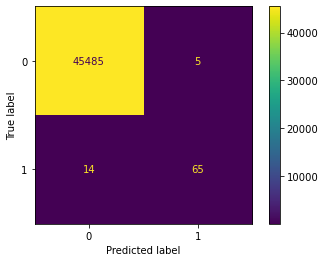

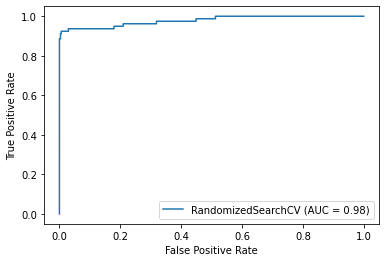

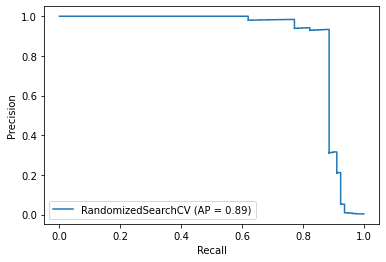

In [16]:
y_train_pred_xgbc = xgbc_rscv.predict(X_train)
y_val_pred_xgbc = xgbc_rscv.predict(X_val)
print('XGBoost Classifier:')
print('-' * 100)
print('Train f1_score: ', f1_score(y_train, y_train_pred_xgbc))
print('Validation f1_score: ', f1_score(y_val, y_val_pred_xgbc))
print('-' * 100)
print('Train precision: ', precision_score(y_train, y_train_pred_xgbc))
print('Validation precision: ', precision_score(y_val, y_val_pred_xgbc))
print('-' * 100)
print('Train recall: ', recall_score(y_train, y_train_pred_xgbc))
print('Validation recall: ', recall_score(y_val, y_val_pred_xgbc))
print('-' * 100)
plot_confusion_matrix(xgbc_rscv, X_val, y_val)
plot_roc_curve(xgbc_rscv, X_val, y_val)
plot_precision_recall_curve(xgbc_rscv, X_val, y_val)

In [18]:
#knc = KNeighborsClassifier()
#possible_parameter_values = {'n_neighbors' : [int(x) for x in np.arange(start = 1, stop = 101, step = 1)],
#                             'weights' : ['uniform', 'distance']}
#knc_rscv = RandomizedSearchCV(estimator = knc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, random_state = 17, n_jobs = 1)
#knc_rscv.fit(X_train, y_train)
#knc_rscv.best_params_

In [19]:
#y_train_pred_knc = knc_rscv.predict(X_train)
#y_val_pred_knc = knc_rscv.predict(X_val)
#print('XGBoost Classifier:')
#print('-' * 100)
#print('Train f1_score: ', f1_score(y_train, y_train_pred_knc))
#print('Validation f1_score: ', f1_score(y_val, y_val_pred_knc))
#print('-' * 100)
#print('Train precision: ', precision_score(y_train, y_train_pred_knc))
#print('Validation precision: ', precision_score(y_val, y_val_pred_knc))
#print('-' * 100)
#print('Train recall: ', recall_score(y_train, y_train_pred_knc))
#print('Validation recall: ', recall_score(y_val, y_val_pred_knc))
#print('-' * 100)
#plot_confusion_matrix(knc_rscv, X_val, y_val)
#plot_roc_curve(knc_rscv, X_val, y_val)
#plot_precision_recall_curve(knc_rscv, X_val, y_val)

In [10]:
#svc = SVC()
#possible_parameter_values = {'C' : [float(x)/10 for x in np.arange(start = 1, stop = 1001, step = 1)],
#                             'gamma' : [float(x)/10000 for x in np.arange(start = 1, stop = 100000, step = 1)]}
#svc_rscv = RandomizedSearchCV(estimator = svc, param_distributions = possible_parameter_values, cv = 10, scoring = 'f1', verbose = 2, random_state = 17, n_jobs = 1)
#svc_rscv.fit(X_train, y_train)
#svc_rscv.best_params_

In [11]:
#y_train_pred_svc = svc_rscv.predict(X_train)
#y_val_pred_svc = svc_rscv.predict(X_val)
#print('XGBoost Classifier:')
#print('-' * 100)
#print('Train f1_score: ', f1_score(y_train, y_train_pred_svc))
#print('Validation f1_score: ', f1_score(y_val, y_val_pred_svc))
#print('-' * 100)
#print('Train precision: ', precision_score(y_train, y_train_pred_svc))
#print('Validation precision: ', precision_score(y_val, y_val_pred_svc))
#print('-' * 100)
#print('Train recall: ', recall_score(y_train, y_train_pred_svc))
#print('Validation recall: ', recall_score(y_val, y_val_pred_svc))
#print('-' * 100)
#plot_confusion_matrix(svc_rscv, X_val, y_val)
#plot_roc_curve(svc_rscv, X_val, y_val)
#plot_precision_recall_curve(svc_rscv, X_val, y_val)

In [27]:
print('Logistic Regression Cross Validation:\n')
f1_train = []
f1_val = []
precision_train = []
precision_val = []
recall_train = []
recall_val = []
random_state = []
X = X_scaled
y = df_train['Class']
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = rs)
    test_model_lr = LogisticRegression()
    test_model_lr.fit(X_train, y_train)
    y_train_pred_tlr = test_model_lr.predict(X_train)
    y_val_pred_tlr = test_model_lr.predict(X_val)
    random_state.append(rs)
    f1_train.append(f1_score(y_train, y_train_pred_tlr))
    f1_val.append(f1_score(y_val, y_val_pred_tlr))
    precision_train.append(precision_score(y_train, y_train_pred_tlr))
    precision_val.append(precision_score(y_val, y_val_pred_tlr))
    recall_train.append(recall_score(y_train, y_train_pred_tlr))
    recall_val.append(recall_score(y_val, y_val_pred_tlr))
data = {'Random State' : random_state, 'Train f1' : f1_train, 'Validation f1' : f1_val, 'Train Precision' : precision_train, 'Validation Precision' : precision_val, 
        'Train Recall' : recall_train, 'Validation Recall' : recall_val}
data = pd.DataFrame(data)
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data['Difference(Precision)'] = ((np.abs(data['Train Precision'] - data['Validation Precision'])) * 100)/(data['Train Precision'])
data['Difference(Recall)'] = ((np.abs(data['Train Recall'] - data['Validation Recall'])) * 100)/(data['Train Recall'])
print('Mean Difference(f1): ', data['Difference(f1)'].mean())
print('Mean Difference(Precision): ', data['Difference(Precision)'].mean())
print('Mean Difference(Recall): ', data['Difference(Recall)'].mean())
data

Logistic Regression Cross Validation:

Mean Difference(f1):  4.660510756558949
Mean Difference(Precision):  6.430511314794375
Mean Difference(Recall):  6.581258087255546


,Random State,Train f1,Validation f1,Train Precision,Validation Precision,Train Recall,Validation Recall,Difference(f1),Difference(Precision),Difference(Recall)
0,17,0.752727,0.750000,0.884615,0.879310,0.655063,0.653846,0.362319,0.599700,0.185805
1,15,0.742857,0.756410,0.886364,0.880597,0.639344,0.662921,1.824458,0.650593,3.687698
2,26,0.776735,0.725000,0.907895,0.816901,0.678689,0.651685,6.660628,10.022454,3.978722
3,1,0.765957,0.656250,0.885246,0.777778,0.675000,0.567568,14.322917,12.139918,15.915916
4,80,0.742115,0.691176,0.873362,0.903846,0.645161,0.559524,6.863971,3.490385,13.273810
5,46,0.741874,0.703448,0.877828,0.962264,0.642384,0.554348,5.179524,9.618751,13.704617
6,13,0.784810,0.736111,0.911765,0.815385,0.688889,0.670886,6.205197,10.570720,2.613312
7,0,0.738574,0.748092,0.882096,0.890909,0.635220,0.644737,1.288640,0.999100,1.498176
8,16,0.729242,0.713043,0.866953,0.976190,0.629283,0.561644,2.221266,12.600189,10.748678
9,25,0.738404,0.726027,0.872807,0.841270,0.639871,0.638554,1.676189,3.613305,0.205849


In [28]:
print('Decision Tree Classifier Cross Validation:\n')
f1_train = []
f1_val = []
precision_train = []
precision_val = []
recall_train = []
recall_val = []
random_state = []
X = X_scaled
y = df_train['Class']
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = rs)
    test_model_dtc = DecisionTreeClassifier(splitter = 'best', min_samples_split = 59, min_samples_leaf = 16, max_depth = 45, criterion = 'gini')
    test_model_dtc.fit(X_train, y_train)
    y_train_pred_tdtc = test_model_dtc.predict(X_train)
    y_val_pred_tdtc = test_model_dtc.predict(X_val)
    random_state.append(rs)
    f1_train.append(f1_score(y_train, y_train_pred_tdtc))
    f1_val.append(f1_score(y_val, y_val_pred_tdtc))
    precision_train.append(precision_score(y_train, y_train_pred_tdtc))
    precision_val.append(precision_score(y_val, y_val_pred_tdtc))
    recall_train.append(recall_score(y_train, y_train_pred_tdtc))
    recall_val.append(recall_score(y_val, y_val_pred_tdtc))
data = {'Random State' : random_state, 'Train f1' : f1_train, 'Validation f1' : f1_val, 'Train Precision' : precision_train, 'Validation Precision' : precision_val, 
        'Train Recall' : recall_train, 'Validation Recall' : recall_val}
data = pd.DataFrame(data)
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data['Difference(Precision)'] = ((np.abs(data['Train Precision'] - data['Validation Precision'])) * 100)/(data['Train Precision'])
data['Difference(Recall)'] = ((np.abs(data['Train Recall'] - data['Validation Recall'])) * 100)/(data['Train Recall'])
print('Mean Difference(f1): ', data['Difference(f1)'].mean())
print('Mean Difference(Precision): ', data['Difference(Precision)'].mean())
print('Mean Difference(Recall): ', data['Difference(Recall)'].mean())
data

Decision Tree Classifier Cross Validation:

Mean Difference(f1):  5.719273226499161
Mean Difference(Precision):  4.401483855214559
Mean Difference(Recall):  8.420120068324907


,Random State,Train f1,Validation f1,Train Precision,Validation Precision,Train Recall,Validation Recall,Difference(f1),Difference(Precision),Difference(Recall)
0,16,0.846154,0.787402,0.913357,0.925926,0.788162,0.684932,6.943450,1.376080,13.097623
1,40,0.822898,0.733333,0.920000,0.846154,0.744337,0.647059,10.884058,8.026756,13.069054
2,46,0.837790,0.723926,0.907336,0.830986,0.778146,0.641304,13.590915,8.414744,17.585569
3,57,0.808989,0.855556,0.919149,0.905882,0.722408,0.810526,5.756173,1.443355,12.197856
4,34,0.822107,0.827068,0.933333,0.873016,0.734568,0.785714,0.603399,6.462585,6.962785
5,66,0.828571,0.858896,0.906250,0.958904,0.763158,0.777778,3.659827,5.810109,1.915709
6,58,0.836735,0.828571,0.911111,0.906250,0.773585,0.763158,0.975610,0.533537,1.347882
7,88,0.818636,0.810811,0.866197,0.845070,0.776025,0.779221,0.955834,2.439024,0.411783
8,91,0.816189,0.761905,0.870504,0.823529,0.768254,0.708861,6.650925,5.396208,7.730934
9,5,0.824818,0.883978,0.904000,0.941176,0.758389,0.833333,7.172542,4.112441,9.882006


In [29]:
#print('Random Forest Classifier Cross Validation:\n')
#f1_train = []
#f1_val = []
#precision_train = []
#precision_val = []
#recall_train = []
#recall_val = []
#random_state = []
#X = X_scaled
#y = df_train['Class']
#for i in range(0, 10):
#    rs = random.randint(0, 100)
#    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = rs)
#    test_model_rfc = RandomForestClassifier()
#    test_model_rfc.fit(X_train, y_train)
#    y_train_pred_trfc = test_model_rfc.predict(X_train)
#    y_val_pred_trfc = test_model_rfc.predict(X_val)
#    random_state.append(rs)
#    f1_train.append(f1_score(y_train, y_train_pred_trfc))
#    f1_val.append(f1_score(y_val, y_val_pred_trfc))
#    precision_train.append(precision_score(y_train, y_train_pred_trfc))
#    precision_val.append(precision_score(y_val, y_val_pred_trfc))
#    recall_train.append(recall_score(y_train, y_train_pred_trfc))
#    recall_val.append(recall_score(y_val, y_val_pred_trfc))
#data = {'Random State' : random_state, 'Train f1' : f1_train, 'Validation f1' : f1_val, 'Train Precision' : precision_train, 'Validation Precision' : precision_val, 
#        'Train Recall' : recall_train, 'Validation Recall' : recall_val}
#data = pd.DataFrame(data)
#data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
#data['Difference(Precision)'] = ((np.abs(data['Train Precision'] - data['Validation Precision'])) * 100)/(data['Train Precision'])
#data['Difference(Recall)'] = ((np.abs(data['Train Recall'] - data['Validation Recall'])) * 100)/(data['Train Recall'])
#print('Mean Difference(f1): ', data['Difference(f1)'].mean())
#print('Mean Difference(Precision): ', data['Difference(Precision)'].mean())
#print('Mean Difference(Recall): ', data['Difference(Recall)'].mean())
#data

In [30]:
#print('Ada Boost Classifier Cross Validation:\n')
#f1_train = []
#f1_val = []
#precision_train = []
#precision_val = []
#recall_train = []
#recall_val = []
#random_state = []
#X = X_scaled
#y = df_train['Class']
#for i in range(0, 10):
#    rs = random.randint(0, 100)
#    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = rs)
#    test_model_abc = AdaBoostClassifier()
#    test_model_abc.fit(X_train, y_train)
#    y_train_pred_tabc = test_model_abc.predict(X_train)
#    y_val_pred_tabc = test_model_abc.predict(X_val)
#    random_state.append(rs)
#    f1_train.append(f1_score(y_train, y_train_pred_tabc))
#    f1_val.append(f1_score(y_val, y_val_pred_tabc))
#    precision_train.append(precision_score(y_train, y_train_pred_tabc))
#    precision_val.append(precision_score(y_val, y_val_pred_tabc))
#    recall_train.append(recall_score(y_train, y_train_pred_tabc))
#    recall_val.append(recall_score(y_val, y_val_pred_tabc))
#data = {'Random State' : random_state, 'Train f1' : f1_train, 'Validation f1' : f1_val, 'Train Precision' : precision_train, 'Validation Precision' : precision_val, 
#        'Train Recall' : recall_train, 'Validation Recall' : recall_val}
#data = pd.DataFrame(data)
#data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
#data['Difference(Precision)'] = ((np.abs(data['Train Precision'] - data['Validation Precision'])) * 100)/(data['Train Precision'])
#data['Difference(Recall)'] = ((np.abs(data['Train Recall'] - data['Validation Recall'])) * 100)/(data['Train Recall'])
#print('Mean Difference(f1): ', data['Difference(f1)'].mean())
#print('Mean Difference(Precision): ', data['Difference(Precision)'].mean())
#print('Mean Difference(Recall): ', data['Difference(Recall)'].mean())
#data

In [31]:
#print('Gradient Boosting Classifier Cross Validation:\n')
#f1_train = []
#f1_val = []
#precision_train = []
#precision_val = []
#recall_train = []
#recall_val = []
#random_state = []
#X = X_scaled
#y = df_train['Class']
#for i in range(0, 10):
#    rs = random.randint(0, 100)
#    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = rs)
#    test_model_gbc = GradientBoostingClassifier()
#    test_model_gbc.fit(X_train, y_train)
#    y_train_pred_tgbc = test_model_gbc.predict(X_train)
#    y_val_pred_tgbc = test_model_gbc.predict(X_val)
#    random_state.append(rs)
#    f1_train.append(f1_score(y_train, y_train_pred_tgbc))
#    f1_val.append(f1_score(y_val, y_val_pred_tgbc))
#    precision_train.append(precision_score(y_train, y_train_pred_tgbc))
#    precision_val.append(precision_score(y_val, y_val_pred_tgbc))
#    recall_train.append(recall_score(y_train, y_train_pred_tgbc))
#    recall_val.append(recall_score(y_val, y_val_pred_tgbc))
#data = {'Random State' : random_state, 'Train f1' : f1_train, 'Validation f1' : f1_val, 'Train Precision' : precision_train, 'Validation Precision' : precision_val, 
#        'Train Recall' : recall_train, 'Validation Recall' : recall_val}
#data = pd.DataFrame(data)
#data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
#data['Difference(Precision)'] = ((np.abs(data['Train Precision'] - data['Validation Precision'])) * 100)/(data['Train Precision'])
#data['Difference(Recall)'] = ((np.abs(data['Train Recall'] - data['Validation Recall'])) * 100)/(data['Train Recall'])
#print('Mean Difference(f1): ', data['Difference(f1)'].mean())
#print('Mean Difference(Precision): ', data['Difference(Precision)'].mean())
#print('Mean Difference(Recall): ', data['Difference(Recall)'].mean())
#data

In [32]:
print('XGBoost Classifier Cross Validation:\n')
f1_train = []
f1_val = []
precision_train = []
precision_val = []
recall_train = []
recall_val = []
random_state = []
X = X_scaled
y = df_train['Class']
for i in range(0,10):
    rs = random.randint(0, 100)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = rs)
    test_model_xgbc = XGBClassifier(use_label_encoder = True, n_estimators = 750, max_depth = 75, learning_rate = 0.1)
    test_model_xgbc.fit(X_train, y_train)
    y_train_pred_txgbc = test_model_xgbc.predict(X_train)
    y_val_pred_txgbc = test_model_xgbc.predict(X_val)
    random_state.append(rs)
    f1_train.append(f1_score(y_train, y_train_pred_txgbc))
    f1_val.append(f1_score(y_val, y_val_pred_txgbc))
    precision_train.append(precision_score(y_train, y_train_pred_txgbc))
    precision_val.append(precision_score(y_val, y_val_pred_txgbc))
    recall_train.append(recall_score(y_train, y_train_pred_txgbc))
    recall_val.append(recall_score(y_val, y_val_pred_txgbc))
data = {'Random State' : random_state, 'Train f1' : f1_train, 'Validation f1' : f1_val, 'Train Precision' : precision_train, 'Validation Precision' : precision_val, 
        'Train Recall' : recall_train, 'Validation Recall' : recall_val}
data = pd.DataFrame(data)
data['Difference(f1)'] = ((np.abs(data['Train f1'] - data['Validation f1'])) * 100)/(data['Train f1'])
data['Difference(Precision)'] = ((np.abs(data['Train Precision'] - data['Validation Precision'])) * 100)/(data['Train Precision'])
data['Difference(Recall)'] = ((np.abs(data['Train Recall'] - data['Validation Recall'])) * 100)/(data['Train Recall'])
print('Mean Difference(f1): ', data['Difference(f1)'].mean())
print('Mean Difference(Precision): ', data['Difference(Precision)'].mean())
print('Mean Difference(Recall): ', data['Difference(Recall)'].mean())
data

XGBoost Classifier Cross Validation:

[00:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:15:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:34] WARNING: C:/Users/Adm

,Random State,Train f1,Validation f1,Train Precision,Validation Precision,Train Recall,Validation Recall,Difference(f1),Difference(Precision),Difference(Recall)
0,50,1.0,0.878378,1.0,0.942029,1.0,0.822785,12.162162,5.797101,17.721519
1,98,1.0,0.839161,1.0,0.909091,1.0,0.779221,16.083916,9.090909,22.077922
2,9,1.0,0.877698,1.0,0.968254,1.0,0.802632,12.230216,3.174603,19.736842
3,2,1.0,0.836879,1.0,0.967213,1.0,0.737500,16.312057,3.278689,26.250000
4,16,1.0,0.816000,1.0,0.980769,1.0,0.698630,18.400000,1.923077,30.136986
5,93,1.0,0.840000,1.0,0.969231,1.0,0.741176,16.000000,3.076923,25.882353
6,30,1.0,0.837838,1.0,0.953846,1.0,0.746988,16.216216,4.615385,25.301205
7,12,1.0,0.871429,1.0,0.924242,1.0,0.824324,12.857143,7.575758,17.567568
8,26,1.0,0.845238,1.0,0.898734,1.0,0.797753,15.476190,10.126582,20.224719
9,12,1.0,0.871429,1.0,0.924242,1.0,0.824324,12.857143,7.575758,17.567568


In [10]:
X_test = df_test
X_test.head()

,Transaction ID,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,468015,162104.0,1.352000,-1.673506,-0.636893,-0.336119,-1.542837,-1.226363,-0.124746,-0.227841,1.540701,-0.534952,-0.334849,0.228246,-0.664118,0.258531,1.259173,0.246986,-0.286924,-0.275878,-0.000941,0.465613,0.051400,-0.558497,0.169942,0.466874,-0.853620,0.271841,-0.108573,0.016582,350.00,0
1,281092,57805.0,-0.768612,1.243045,1.091212,0.193316,-0.492666,-0.892758,0.219895,0.530861,-0.408229,-0.746581,0.115501,-0.352875,-1.236115,0.206609,1.210958,0.119147,0.722636,-0.560869,-0.647259,-0.116070,-0.170618,-0.594718,0.165624,0.517823,-0.321773,0.075277,0.126837,0.035620,9.81,0
2,212503,16781.0,-1.596231,0.404615,2.194786,-2.741233,-0.865271,-0.944760,-0.127869,0.502866,2.571508,-2.775742,0.868098,-1.375156,1.839486,1.269027,-0.387818,-0.322163,0.686652,-0.158159,-1.594824,-0.104222,0.110902,0.596544,-0.219749,0.600184,0.598460,-0.255279,0.143856,0.019840,37.08,0
3,367732,117554.0,-0.382983,1.063542,-1.094111,-0.053626,0.537947,-1.388576,0.663167,-0.216840,0.372559,-0.476902,-0.598992,-0.475948,-0.520418,-0.884354,0.854545,0.117423,0.586687,0.692713,-0.254871,-0.448479,0.271541,0.955643,0.072718,-0.176539,-0.311954,-0.205355,-0.691227,-0.324247,2.99,0
4,480118,167993.0,1.911940,0.109419,-0.379744,3.381940,0.281194,1.138123,-0.670080,0.386373,-0.382842,1.654088,-1.030125,-0.943646,-1.370587,0.361032,-0.484696,2.076593,-1.742429,1.271893,-1.076403,-0.305569,0.143581,0.317334,0.038104,-1.465384,-0.189313,0.067137,-0.009806,-0.056292,15.17,0


In [11]:
X_test = df_test.drop(['Transaction ID', 'Time', 'Class'], axis = 1)
y_test = df_test['Class']
X_test = pd.DataFrame(ss.fit_transform(X_test), columns = X_test.columns)

In [12]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.691631,-1.005289,-0.425668,-0.238792,-1.129568,-0.925052,-0.101540,-0.194625,1.412383,-0.494863,-0.329989,0.225945,-0.669302,0.266872,1.376178,0.279270,-0.330354,-0.326214,0.000785,0.625142,0.064638,-0.770482,0.270978,0.775015,-1.634349,0.553621,-0.270696,0.044808,1.139044
1,-0.393768,0.750198,0.728660,0.135429,-0.360798,-0.673758,0.188685,0.445669,-0.367753,-0.689823,0.109962,-0.351717,-1.242926,0.213296,1.323625,0.134186,0.836916,-0.665130,-0.796009,-0.158424,-0.243576,-0.820449,0.263967,0.859594,-0.610631,0.147694,0.320351,0.099297,-0.341190
2,-0.817371,0.245543,1.465818,-1.938802,-0.633561,-0.712929,-0.104169,0.422043,2.353912,-2.559153,0.845180,-1.367915,1.841421,1.309564,-0.419008,-0.366656,0.795310,-0.186221,-1.964189,-0.142464,0.147240,0.822860,-0.361711,0.996319,1.160667,-0.534943,0.363080,0.054135,-0.222533
3,-0.196390,0.642154,-0.731078,-0.039117,0.393655,-1.047243,0.561969,-0.185342,0.345412,-0.441386,-0.588032,-0.474058,-0.525193,-0.912426,0.935141,0.132229,0.679729,0.825650,-0.312264,-0.606201,0.370246,1.318226,0.113127,-0.293092,-0.591732,-0.431843,-1.733571,-0.930676,-0.370865
4,0.978227,0.067862,-0.253899,2.389249,0.205701,0.856043,-0.560770,0.323730,-0.344565,1.521753,-1.009209,-0.938972,-1.377780,0.372639,-0.524604,2.355686,-2.013229,1.514420,-1.325067,-0.413691,0.192607,0.437698,0.056930,-2.432661,-0.355668,0.130884,-0.022719,-0.163763,-0.317868


In [13]:
X_test = pd.concat([df_test['Transaction ID'], X_test], axis = 1)
X_test.head()

,Transaction ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,468015,0.691631,-1.005289,-0.425668,-0.238792,-1.129568,-0.925052,-0.101540,-0.194625,1.412383,-0.494863,-0.329989,0.225945,-0.669302,0.266872,1.376178,0.279270,-0.330354,-0.326214,0.000785,0.625142,0.064638,-0.770482,0.270978,0.775015,-1.634349,0.553621,-0.270696,0.044808,1.139044
1,281092,-0.393768,0.750198,0.728660,0.135429,-0.360798,-0.673758,0.188685,0.445669,-0.367753,-0.689823,0.109962,-0.351717,-1.242926,0.213296,1.323625,0.134186,0.836916,-0.665130,-0.796009,-0.158424,-0.243576,-0.820449,0.263967,0.859594,-0.610631,0.147694,0.320351,0.099297,-0.341190
2,212503,-0.817371,0.245543,1.465818,-1.938802,-0.633561,-0.712929,-0.104169,0.422043,2.353912,-2.559153,0.845180,-1.367915,1.841421,1.309564,-0.419008,-0.366656,0.795310,-0.186221,-1.964189,-0.142464,0.147240,0.822860,-0.361711,0.996319,1.160667,-0.534943,0.363080,0.054135,-0.222533
3,367732,-0.196390,0.642154,-0.731078,-0.039117,0.393655,-1.047243,0.561969,-0.185342,0.345412,-0.441386,-0.588032,-0.474058,-0.525193,-0.912426,0.935141,0.132229,0.679729,0.825650,-0.312264,-0.606201,0.370246,1.318226,0.113127,-0.293092,-0.591732,-0.431843,-1.733571,-0.930676,-0.370865
4,480118,0.978227,0.067862,-0.253899,2.389249,0.205701,0.856043,-0.560770,0.323730,-0.344565,1.521753,-1.009209,-0.938972,-1.377780,0.372639,-0.524604,2.355686,-2.013229,1.514420,-1.325067,-0.413691,0.192607,0.437698,0.056930,-2.432661,-0.355668,0.130884,-0.022719,-0.163763,-0.317868


In [14]:
test_model_dtc = DecisionTreeClassifier(splitter = 'best', min_samples_split = 59, min_samples_leaf = 16, max_depth = 45, criterion = 'gini')
test_model_dtc

DecisionTreeClassifier(max_depth=45, min_samples_leaf=16, min_samples_split=59)

In [15]:
test_model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=45, min_samples_leaf=16, min_samples_split=59)

In [26]:
txn_id = 300315
txn_id

300315

In [27]:
filtered_data = X_test[X_test['Transaction ID'] == txn_id]
filtered_data

,Transaction ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6,300315,0.690519,-0.295924,0.511767,-0.447516,-0.84804,-0.522602,-0.611711,-0.056095,-0.664462,0.523955,0.299507,-0.285387,0.332139,-0.230764,1.17999,0.982911,0.658941,-2.263069,-0.004856,0.035727,0.205301,0.574259,0.144323,0.682422,0.500528,-0.571281,0.091338,0.055553,-0.375173


In [46]:
y_pred = test_model_dtc.predict_proba(filtered_data.iloc[:, 1:])[0][1]

In [47]:
y_pred

0.0

In [46]:
file = open('fraud_detect.pkl', 'wb')
pickle.dump(test_model_dtc, file)
file.close()